<a href="https://colab.research.google.com/github/rvnalage/project/blob/master/Named_Entity_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install spacy scikit-learn matplotlib



In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [2]:
text = """Apple Inc. is looking to buy a UK-based startup for $1 billion.
          The deal is expected to be finalized in 2024, according to CEO Tim Cook.
          Meanwhile, Google and Microsoft are investing in AI projects in California.
       """


In [7]:
doc = nlp(text)

for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

Entity: Apple Inc., Label: ORG
Entity: UK, Label: GPE
Entity: $1 billion, Label: MONEY
Entity: 2024, Label: DATE
Entity: Tim Cook, Label: PERSON
Entity: Google, Label: ORG
Entity: Microsoft, Label: ORG
Entity: AI, Label: GPE
Entity: California, Label: GPE


In [8]:
from spacy import displacy

displacy.render(doc, style="ent", jupyter=True)


In [10]:
true_entities = [
    ("Apple Inc.", "ORG"),
    ("UK", "GPE"),
    ("$1 billion", "MONEY"),
    ("2024", "DATE"),
    ("Tim Cook", "PERSON"),
    ("Google", "ORG"),
    ("Microsoft", "ORG"),
    ("California", "GPE"),
]


In [15]:
predicted_entities = [(ent.text, ent.label_) for ent in doc.ents]


In [16]:
from sklearn.metrics import precision_recall_fscore_support

# Extract labels from true and predicted entities
true_labels = [label for _, label in true_entities]
predicted_labels = [label for _, label in predicted_entities]

# Ensure both lists have the same length
min_length = min(len(true_labels), len(predicted_labels))
true_labels = true_labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# Debugging: Print list lengths before computing scores
print("Length of true labels:", len(true_labels))
print("Length of predicted labels:", len(predicted_labels))

# Compute Precision, Recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    true_labels,
    predicted_labels,
    average="weighted",
    zero_division=1  # Prevents division errors
)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Length of true labels: 8
Length of predicted labels: 8
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [17]:
print("True Entities:", true_entities)
print("Predicted Entities:", predicted_entities)


True Entities: [('Apple Inc.', 'ORG'), ('UK', 'GPE'), ('$1 billion', 'MONEY'), ('2024', 'DATE'), ('Tim Cook', 'PERSON'), ('Google', 'ORG'), ('Microsoft', 'ORG'), ('California', 'GPE')]
Predicted Entities: [('Apple Inc.', 'ORG'), ('UK', 'GPE'), ('$1 billion', 'MONEY'), ('2024', 'DATE'), ('Tim Cook', 'PERSON'), ('Google', 'ORG'), ('Microsoft', 'ORG'), ('AI', 'GPE'), ('California', 'GPE')]


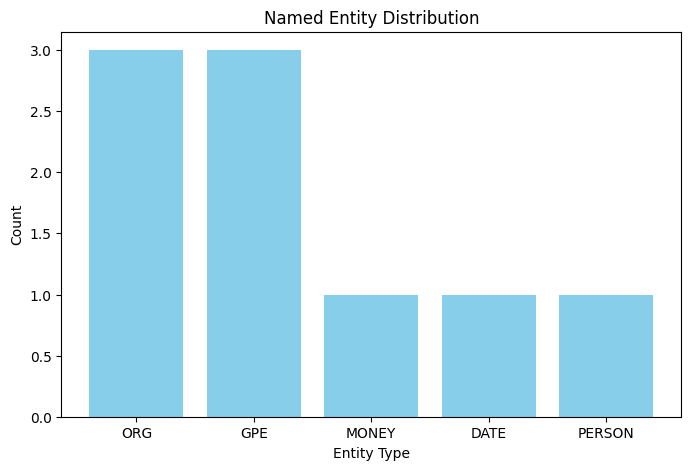

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Count entity labels
entity_counts = Counter(ent.label_ for ent in doc.ents)

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(entity_counts.keys(), entity_counts.values(), color="skyblue")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Named Entity Distribution")
plt.show()
